In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import pickle
import time


  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0             b'-1'       b'1'               b'1'             b'1'   
1              b'1'       b'1'               b'1'             b'1'   
2              b'1'       b'0'               b'1'             b'1'   
3              b'1'       b'0'               b'1'             b'1'   
4              b'1'       b'0'              b'-1'             b'1'   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                    b'-1'         b'-1'             b'-1'          b'-1'   
1                     b'1'         b'-1'              b'0'           b'1'   
2                     b'1'         b'-1'             b'-1'          b'-1'   
3                     b'1'         b'-1'             b'-1'          b'-1'   
4                     b'1'         b'-1'              b'1'           b'1'   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                       b'-1'    b'1'

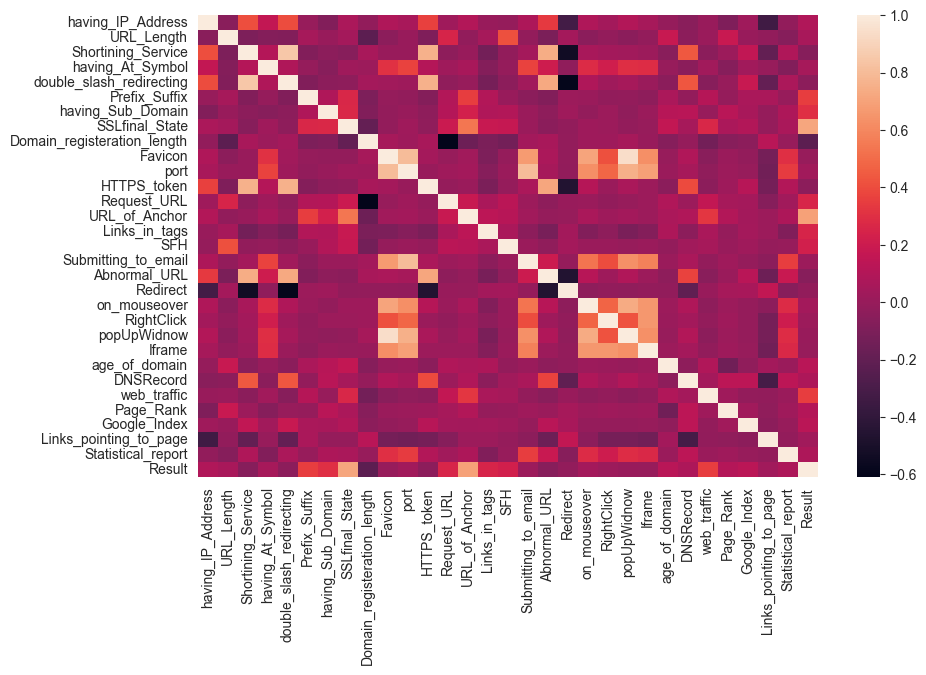

Data Loaded successfully.
Shape: (11055, 31)


In [2]:
# Load Data
try:
    data, meta = arff.loadarff('Training Dataset.arff')
    df = pd.DataFrame(data)
    print(df.head())

    # Checking values in features

    for c in df.columns:
        print(df[c].unique())

    # EDA
    df.info()
    df.describe()

    # Heatmap is used to correlation among features
    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(), annot=False)
    plt.show()

    # Preprocessing: Convert byte strings to integers
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.decode('utf-8').astype(int)

    print("Data Loaded successfully.")
    print(f"Shape: {df.shape}")
except Exception as e:
    print(f"Error loading data: {e}")

In [3]:
# Split Data
X = df.drop('Result', axis=1)
y = df['Result']

# Ensure target is 0 and 1 for XGBoost and consistency
# The dataset has -1 and 1. Mapping -1 to 0.
y = y.apply(lambda x: 0 if x == -1 else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (8844, 30)
Testing set size: (2211, 30)


In [4]:
# Models Definition - For Classification
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

print("\nTraining models...")
for name, model in models.items():
    print(f"Training {name}...")
    start = time.time()
    model.fit(X_train, y_train)
    duration = time.time() - start
    
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Time (s)': duration
    })

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nResults:")
display(results_df)


Training models...
Training Logistic Regression...
Training KNN...
Training SVM...
Training Naive Bayes...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

Results:


C:\Users\Amjath Hassan\Entri\Mini Project\Mini project 1\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:02:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1,Time (s)
7,XGBoost,0.970602,0.964844,0.984064,0.974359,0.196260
5,Random Forest,0.966983,0.962441,0.980080,0.971180,0.330603
4,Decision Tree,0.957938,0.962580,0.963347,0.962963,0.013824
6,Gradient Boosting,0.950701,0.949060,0.964940,0.956934,0.551289
2,SVM,0.947083,0.942457,0.965737,0.953955,0.615929
1,KNN,0.936680,0.940016,0.949004,0.944489,0.002291
0,Logistic Regression,0.924469,0.928346,0.939442,0.933861,0.027809
3,Naive Bayes,0.582994,0.997015,0.266135,0.420126,0.004726


In [ ]:
# Save Best Model
best_name = results_df.iloc[0]['Model']
best_model = models[best_name]

with open('phishing_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nSaved {best_name} to phishing_model.pkl")